# Force-200: Results (max_iter=20)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Data Pre-processing

In [2]:
# force train dataset
train = pd.read_csv(filepath_or_buffer='force_train.csv', sep=';')

# force test dataset
test = pd.read_csv(filepath_or_buffer='force_test.csv', sep=';')


In [3]:
# rename columns
train.rename(columns={'WELL': 'WELL_ID', 
                      'DEPTH_MD': 'DEPTH',
                      'X_LOC' : 'X',
                      'Y_LOC': 'Y', 
                      'GROUP': 'STRAT'
                     }, inplace=True
            )

test.rename(columns={'WELL': 'WELL_ID', 
                     'DEPTH_MD': 'DEPTH',
                     'X_LOC' : 'X',
                     'Y_LOC': 'Y', 
                     'GROUP': 'STRAT'
                    }, inplace=True
               )

In [4]:
# drop columns
train.drop(['Z_LOC', 'CALI', 'SGR', 'BS', 'ROP', 
            'DCAL', 'MUDWEIGHT', 'RMIC','ROPA', 'RXO', 
            'FORCE_2020_LITHOFACIES_LITHOLOGY',
            'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1, inplace=True)

test.drop(['Z_LOC', 'CALI', 'SGR', 'BS', 'ROP', 
            'DCAL', 'MUDWEIGHT', 'RMIC','ROPA', 'RXO', 
            'FORCE_2020_LITHOFACIES_LITHOLOGY',
            'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1, inplace=True)

In [5]:
# create a new column to store log base 10 of resistivity
# train
train['RD10'] = np.log10(train['RDEP']+1)
train['RM10'] = np.log10(train['RMED']+1)
train['RS10'] = np.log10(train['RSHA']+1)

# test
test['RD10'] = np.log10(test['RDEP']+1)
test['RM10'] = np.log10(test['RMED']+1)
test['RS10'] = np.log10(test['RSHA']+1)

In [6]:
# label encoding for well id
well_encoder = LabelEncoder()
well_encoder.fit(pd.concat([train, test]).WELL_ID.replace(np.nan, ''))

train['WELL'] = well_encoder.transform(train.WELL_ID.replace(np.nan, ''))
train['WELL'] = train['WELL'].astype(int)

test['WELL'] = well_encoder.transform(test.WELL_ID.replace(np.nan, ''))
test['WELL'] = test['WELL'].astype(int)


In [7]:
# feature selection
selected_features = ['WELL', 'X_LOC', 'Y_LOC', 'DEPTH',
                     'RHOB', 'GR', 'DTC', 'DTS',
                     'RD10', 'RM10', 'RS10',
                     'SP', 'NPHI','PEF',
                     'STRAT_ENCODED']

## 2. Results

### Test

In [8]:
# results from mice
test_result_knr = pd.read_csv('test_result_knr.csv').add_suffix('_KNR')
test_result_br = pd.read_csv('test_result_br.csv').add_suffix('_BR')
test_result_rf = pd.read_csv('test_result_rf.csv').add_suffix('_RF')
test_result_xgb = pd.read_csv('test_result_xgb.csv').add_suffix('_XGB')

In [9]:
test_df = test.copy()
test_df.reset_index(drop=True, inplace=True)

# merge mice results with the test data
test_df = test_df.merge(test_result_knr, left_index=True, right_index=True)
test_df = test_df.merge(test_result_br, left_index=True, right_index=True)
test_df = test_df.merge(test_result_rf, left_index=True, right_index=True)
test_df = test_df.merge(test_result_xgb, left_index=True, right_index=True)

In [10]:
test_df

,WELL_ID,DEPTH,X,Y,STRAT,FORMATION,RSHA,RMED,RDEP,RHOB,...,NPHI_IMP_SCALED_XGB,RHOB_IMP_XGB,GR_IMP_XGB,DTC_IMP_XGB,DTS_IMP_XGB,RD10_IMP_XGB,RM10_IMP_XGB,RS10_IMP_XGB,SP_IMP_XGB,NPHI_IMP_XGB
0,15/9-23,1518.2800,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.878615,NaN,...,0.474574,2.082624,64.627709,131.495886,374.084922,0.299376,0.242125,NaN,NaN,0.455548
1,15/9-23,1518.4320,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.874237,NaN,...,0.468850,1.935316,63.396880,139.943069,406.648454,0.384657,0.257206,NaN,NaN,0.449622
2,15/9-23,1518.5840,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.869858,NaN,...,0.475979,1.831417,70.016406,151.389360,413.653241,0.319469,0.258747,NaN,NaN,0.457003
3,15/9-23,1518.7360,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,NaN,0.865479,NaN,...,0.477167,1.873419,78.059680,145.606833,368.277662,0.321988,0.286761,NaN,NaN,0.458233
4,15/9-23,1518.8880,433906.7500,6460000.5,HORDALAND GP.,Skade Fm.,NaN,0.849849,0.863804,NaN,...,0.481268,2.115279,80.146271,128.973915,347.807242,0.284060,0.243106,NaN,NaN,0.462479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,35/9-7,2973.2988,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.820439,3.158570,NaN,...,0.239892,2.435479,49.584698,79.937388,140.159248,0.620641,0.708796,NaN,NaN,0.212560
122393,35/9-7,2973.4508,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,3.020778,3.332977,NaN,...,0.231991,2.435365,39.829949,79.073712,142.881986,0.649757,0.671995,NaN,NaN,0.204379
122394,35/9-7,2973.6028,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.795711,3.044179,NaN,...,0.224983,2.424140,38.524997,80.060092,140.049752,0.622966,0.646255,NaN,NaN,0.197123
122395,35/9-7,2973.7548,536096.0625,6793022.0,BAAT GP.,Etive Fm.,NaN,2.658694,2.847681,NaN,...,0.214149,2.393324,44.044604,78.761408,144.855747,0.586033,0.605439,NaN,NaN,0.185906


### 3.1. MICE Performance

In [11]:
well_logs = ['RHOB', 'GR', 'DTC', 'DTS', 
             'RD10', 'RM10', 'RS10', 
             'SP', 'NPHI']

models = ['KNR', 'BR', 'RF', 'XGB']

evaluation_results = {}
for log in well_logs:
    
    evaluation_results[log] = {}
    for model in models:

        column_name = f'{log}_{model}'
        
        original_values = test_df[f'{log}_SCALED_{model}'].dropna()
        original_index = list(original_values.index.values)
        imputed_values = test_df.loc[original_index, f'{log}_IMP_SCALED_{model}']
        
        mae = mean_absolute_error(original_values, imputed_values)
        mse = mean_squared_error(original_values, imputed_values)
        r2 = r2_score(original_values, imputed_values)
        
        evaluation_results[log][model] = {'R2': r2, 'MAE': mae, 'MSE': mse}

evaluation_results_df = {}
for log, models in evaluation_results.items():
    
    table_data = []
    for model, metrics in models.items():
        cols = {'Model': model, 'R2': metrics['R2'], 'MAE': metrics['MAE'], 'MSE': metrics['MSE']}
        table_data.append(cols)
    
    df = pd.DataFrame(table_data)
    
    evaluation_results_df[log] = df

for log, df in evaluation_results_df.items():
    print(f'Well-log: {log}')
    display(df.round(4).sort_values('MSE', ascending=True))
    print('\n')

Well-log: RHOB


,Model,R2,MAE,MSE
3,XGB,0.7098,0.0315,0.0019
2,RF,0.6212,0.0358,0.0025
0,KNR,0.5454,0.0377,0.0030
1,BR,0.5007,0.0442,0.0033




Well-log: GR


,Model,R2,MAE,MSE
3,XGB,0.2740,0.0204,0.0008
1,BR,0.1059,0.0236,0.0010
2,RF,0.0765,0.0237,0.0010
0,KNR,0.0001,0.0236,0.0011




Well-log: DTC


,Model,R2,MAE,MSE
2,RF,0.8941,0.0213,0.0010
3,XGB,0.8719,0.0244,0.0012
1,BR,0.8249,0.0294,0.0016
0,KNR,0.7476,0.0303,0.0023




Well-log: DTS


,Model,R2,MAE,MSE
1,BR,0.8407,0.0460,0.0038
2,RF,0.8244,0.0415,0.0041
3,XGB,0.8092,0.0456,0.0045
0,KNR,0.7763,0.0472,0.0053




Well-log: RD10


,Model,R2,MAE,MSE
2,RF,0.9224,0.0205,0.0021
3,XGB,0.8978,0.0240,0.0027
0,KNR,0.3568,0.0477,0.0172
1,BR,0.3086,0.0465,0.0185




Well-log: RM10


,Model,R2,MAE,MSE
2,RF,0.7893,0.0178,0.0013
0,KNR,0.7667,0.0203,0.0015
3,XGB,0.7296,0.0180,0.0017
1,BR,0.5104,0.0280,0.0031




Well-log: RS10


,Model,R2,MAE,MSE
2,RF,0.6454,0.0382,0.0064
3,XGB,0.4887,0.0418,0.0093
0,KNR,0.3851,0.0437,0.0111
1,BR,0.2302,0.0696,0.0139




Well-log: SP


,Model,R2,MAE,MSE
2,RF,-0.5960,0.0456,0.0038
0,KNR,-0.8918,0.0487,0.0045
3,XGB,-1.0656,0.0519,0.0049
1,BR,-1.2134,0.0509,0.0052




Well-log: NPHI


,Model,R2,MAE,MSE
1,BR,0.6694,0.0540,0.0049
3,XGB,0.5459,0.0548,0.0067
2,RF,0.5294,0.0571,0.0070
0,KNR,0.5180,0.0586,0.0071


In [12]:
r2_results_df = pd.DataFrame()
mae_results_df = pd.DataFrame()
mse_results_df = pd.DataFrame()

for log, df in evaluation_results_df.items():
    r2_results_df[log] = df['R2']
    mae_results_df[log] = df['MAE']
    mse_results_df[log] = df['MSE']

r2_results_df.index = df['Model']
mae_results_df.index = df['Model']
mse_results_df.index = df['Model']


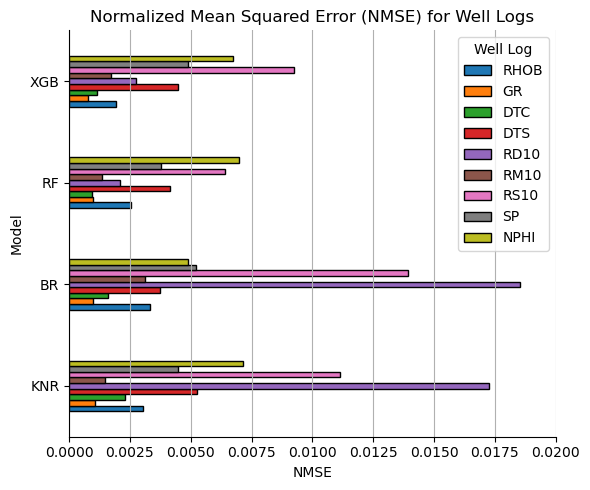

Model,KNR,BR,RF,XGB
RHOB,0.0030,0.0033,0.0025,0.0019
GR,0.0011,0.0010,0.0010,0.0008
DTC,0.0023,0.0016,0.0010,0.0012
DTS,0.0053,0.0038,0.0041,0.0045
RD10,0.0172,0.0185,0.0021,0.0027
RM10,0.0015,0.0031,0.0013,0.0017
RS10,0.0111,0.0139,0.0064,0.0093
SP,0.0045,0.0052,0.0038,0.0049
NPHI,0.0071,0.0049,0.0070,0.0067


In [17]:

ax = mse_results_df.plot(kind='barh', figsize=(6, 5), edgecolor='black')

plt.title('Normalized Mean Squared Error (NMSE) for Well Logs')
plt.ylabel('Model')
plt.xlabel('NMSE')

plt.xticks(rotation='horizontal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True)
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))

ax.set_xlim([0, 0.02])

plt.tight_layout() 
plt.show()

display(mse_results_df.T.round(4))


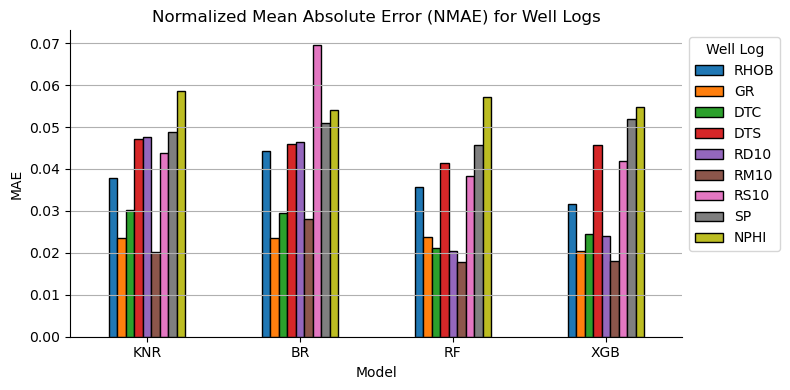

Model,KNR,BR,RF,XGB
RHOB,0.0377,0.0442,0.0358,0.0315
GR,0.0236,0.0236,0.0237,0.0204
DTC,0.0303,0.0294,0.0213,0.0244
DTS,0.0472,0.0460,0.0415,0.0456
RD10,0.0477,0.0465,0.0205,0.0240
RM10,0.0203,0.0280,0.0178,0.0180
RS10,0.0437,0.0696,0.0382,0.0418
SP,0.0487,0.0509,0.0456,0.0519
NPHI,0.0586,0.0540,0.0571,0.0548


In [14]:
ax = mae_results_df.plot(kind='bar', figsize=(8, 4), edgecolor='black')

plt.title('Normalized Mean Absolute Error (NMAE) for Well Logs')
plt.xlabel('Model')
plt.ylabel('MAE')

plt.xticks(rotation='horizontal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(True)
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()

# ax.set_ylim([0, 0.1])

display(mae_results_df.T.round(4))


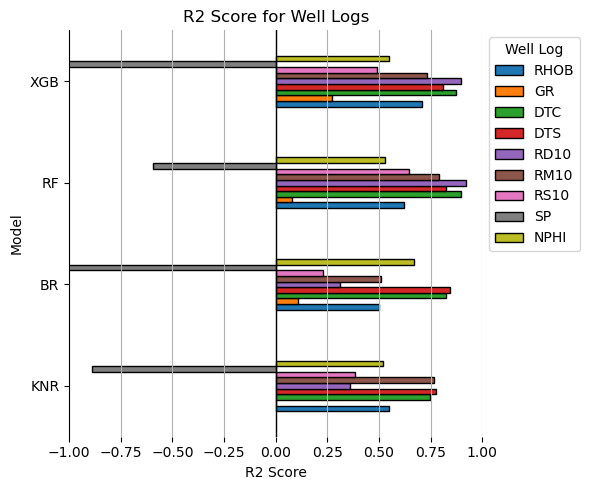

Model,KNR,BR,RF,XGB
RHOB,0.55,0.50,0.62,0.71
GR,0.00,0.11,0.08,0.27
DTC,0.75,0.82,0.89,0.87
DTS,0.78,0.84,0.82,0.81
RD10,0.36,0.31,0.92,0.90
RM10,0.77,0.51,0.79,0.73
RS10,0.39,0.23,0.65,0.49
SP,-0.89,-1.21,-0.60,-1.07
NPHI,0.52,0.67,0.53,0.55


In [18]:

ax = r2_results_df.plot(kind='barh', figsize=(6, 5), edgecolor='black')

plt.title('R2 Score for Well Logs')
plt.ylabel('Model')
plt.xlabel('R2 Score')
ax.legend(title='Well Log', bbox_to_anchor=(1, 1))
plt.xticks(rotation='horizontal')
plt.axvline(0, color='black', linewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.grid(True)

ax.set_xlim([-1, 1])

plt.tight_layout()  
plt.show()
display(r2_results_df.T.round(2))
